In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

### General Set

In [2]:
index_file = '/data/grbv/PDBbind/index/INDEX_general_PL_data.2020'

In [3]:
results_general = {}

successful = 0
failed = 0
Kd_complexes = 0
Ki_complexes = 0
IC50_complexes = 0

# Open the text file for reading
with open(index_file, 'r') as file:
    # Skip the header lines
    for _ in range(6):
        next(file)

    # Read and process each line in the file
    for line in file:

        # Split the line into columns based on whitespace
        columns = line.strip().split()

        # Extract relevant information from columns
        pdb_code = columns[0]
        resolution = columns[1]
        kd_or_ki_value_str = columns[4]

        if '<=' in kd_or_ki_value_str:
            type, affinity = kd_or_ki_value_str.strip().split('<=')
            value = affinity[:-2]
            unit = affinity[-2:]

        elif '>=' in kd_or_ki_value_str:
            type, affinity = kd_or_ki_value_str.strip().split('>=')
            value = affinity[:-2]
            unit = affinity[-2:]

        elif '=' in kd_or_ki_value_str:
            type, affinity = kd_or_ki_value_str.strip().split('=')
            value = affinity[:-2]
            unit = affinity[-2:]

        elif '>' in kd_or_ki_value_str:
            type, affinity = kd_or_ki_value_str.strip().split('>')
            value = affinity[:-2]
            unit = affinity[-2:]

        elif '<' in kd_or_ki_value_str:
            type, affinity = kd_or_ki_value_str.strip().split('<')
            value = affinity[:-2]
            unit = affinity[-2:]

        elif '~' in kd_or_ki_value_str:
            type, affinity = kd_or_ki_value_str.strip().split('~')
            value = affinity[:-2]
            unit = affinity[-2:]

        else:
            raise Exception
            

        # Convert the numeric part to a float
        value = float(value)

        # Apply scaling factor based on the unit

        if unit == 'M':
            affinity = value
            results_general[pdb_code]={type:affinity, 'resolution':resolution}      
        elif unit == 'mM':
            affinity = value * 1e-3
            results_general[pdb_code]={type:affinity, 'resolution':resolution}
        elif unit == 'uM':
            affinity = value * 1e-6
            results_general[pdb_code]={type:affinity, 'resolution':resolution}
        elif unit == 'nM':
            affinity = value * 1e-9
            results_general[pdb_code]={type:affinity, 'resolution':resolution}
        elif unit == 'pM':
            affinity = value * 1e-12
            results_general[pdb_code]={type:affinity, 'resolution':resolution}
        elif unit == 'fM':
            affinity = value * 1e-15
            results_general[pdb_code]={type:affinity, 'resolution':resolution}
        else:
            print(pdb_code)
            raise Exception


        successful+=1
        if type == 'Kd': Kd_complexes+=1
        elif type == 'Ki': Ki_complexes+=1
        elif type == 'IC50': IC50_complexes+=1
        else: print(pdb_code, type, unit)

        

print(f'Extracted Affinity Value from {successful} Complexes')
print(f'Number of Datapoints with Kd = {Kd_complexes}')
print(f'Number of Datapoints with Ki = {Ki_complexes}')
print(f'Number of Datapoints with IC50 = {IC50_complexes}')

Extracted Affinity Value from 19443 Complexes
Number of Datapoints with Kd = 7249
Number of Datapoints with Ki = 5004
Number of Datapoints with IC50 = 7190


In [4]:
# Print the results
for pdb_code, value in results_general.items():
    print(f'PDB code: {pdb_code}, Affinity Data {value}')

PDB code: 3zzf, Affinity Data {'Ki': 0.4, 'resolution': '2.20'}
PDB code: 3gww, Affinity Data {'IC50': 0.355, 'resolution': '2.46'}
PDB code: 1w8l, Affinity Data {'Ki': 0.32, 'resolution': '1.80'}
PDB code: 3fqa, Affinity Data {'IC50': 0.32, 'resolution': '2.35'}
PDB code: 1zsb, Affinity Data {'Kd': 0.25, 'resolution': '2.00'}
PDB code: 6h9v, Affinity Data {'Kd': 0.22, 'resolution': '1.52'}
PDB code: 4obv, Affinity Data {'Ki': 0.178, 'resolution': '2.84'}
PDB code: 1wkm, Affinity Data {'Ki': 0.15, 'resolution': '2.30'}
PDB code: 3k41, Affinity Data {'Kd': 0.15, 'resolution': '1.90'}
PDB code: 4eu3, Affinity Data {'Ki': 0.15, 'resolution': '1.58'}
PDB code: 2w97, Affinity Data {'Kd': 0.11, 'resolution': '2.29'}
PDB code: 1p0y, Affinity Data {'Ki': 0.1008, 'resolution': '2.55'}
PDB code: 2b1r, Affinity Data {'Ki': 0.101, 'resolution': '2.20'}
PDB code: 2d2v, Affinity Data {'Ki': 0.1, 'resolution': '2.50'}
PDB code: 1aw1, Affinity Data {'Ki': 0.089, 'resolution': '2.70'}
PDB code: 1maw, A

In [5]:
import pandas as pd
affinities = []

for pdb_code, value in results_general.items():

    if 'Ki' in value.keys(): affinities.append(value['Ki'])
    if 'Kd' in value.keys(): affinities.append(value['Kd'])
    if 'IC50' in value.keys(): affinities.append(value['IC50'])


affinities = sorted(affinities)
np_affinities = np.array(affinities)
neglog_affinities = (-1)* np.log(np_affinities)

stack = np.vstack((np.array(affinities), np_affinities, neglog_affinities))
df = pd.DataFrame(stack).transpose()
df

,0,1,2
0,6.000000e-16,6.000000e-16,35.049602
1,1.000000e-15,1.000000e-15,34.538776
2,1.000000e-15,1.000000e-15,34.538776
3,4.100000e-15,4.100000e-15,33.127789
4,1.100000e-14,1.100000e-14,32.140881
...,...,...,...
19438,2.500000e-01,2.500000e-01,1.386294
19439,3.200000e-01,3.200000e-01,1.139434
19440,3.200000e-01,3.200000e-01,1.139434
19441,3.550000e-01,3.550000e-01,1.035637


In [6]:
df.describe()

,0,1,2
count,1.944300e+04,1.944300e+04,19443.000000
mean,4.340430e-04,4.340430e-04,14.637318
std,6.671503e-03,6.671503e-03,4.274482
min,6.000000e-16,6.000000e-16,0.916291
25%,2.000000e-08,2.000000e-08,11.596307
50%,3.870000e-07,3.870000e-07,14.764841
75%,9.200000e-06,9.200000e-06,17.727534
max,4.000000e-01,4.000000e-01,35.049602


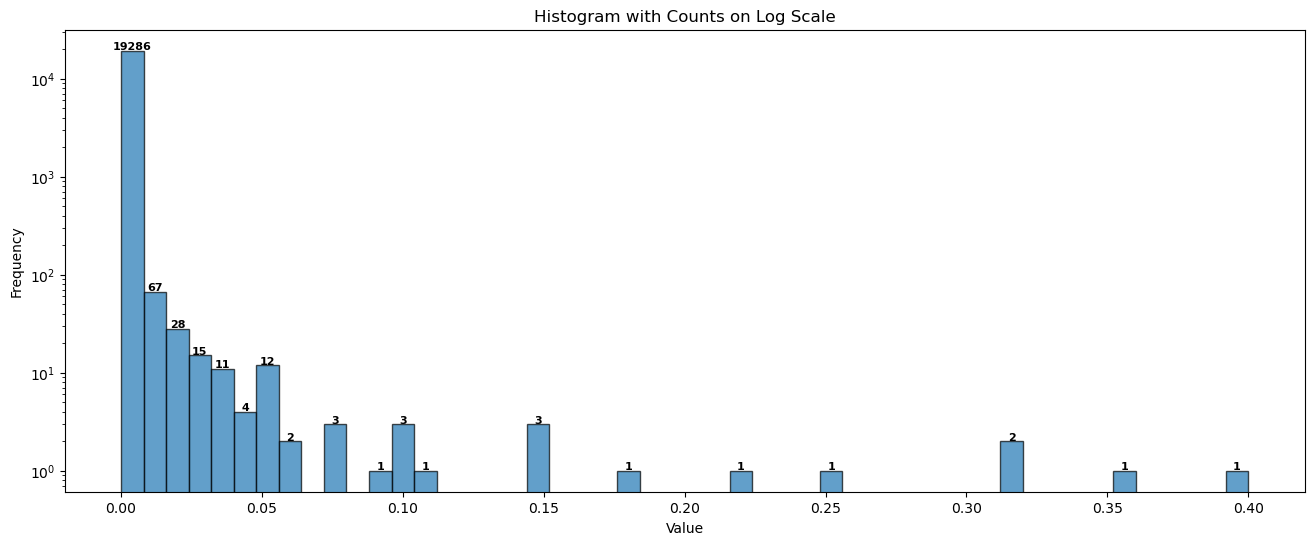

In [12]:
# Set figure size with double width
plt.figure(figsize=(16, 6))  # default is usually (6, 4)

# Create the histogram with log scale for y-axis
n, bins, patches = plt.hist(affinities, bins=50, edgecolor='black', alpha=0.7, log=True)

# Annotate bars with their counts
for i in range(50):
    if n[i] > 0:  # To avoid placing text for bins with no counts on a log scale
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i]*1.1, str(int(n[i])),
                 ha='center', va='center', fontweight='bold', fontsize=8)

# Setting the y-axis to logarithmic
plt.yscale('log')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Counts on Log Scale')
plt.show()

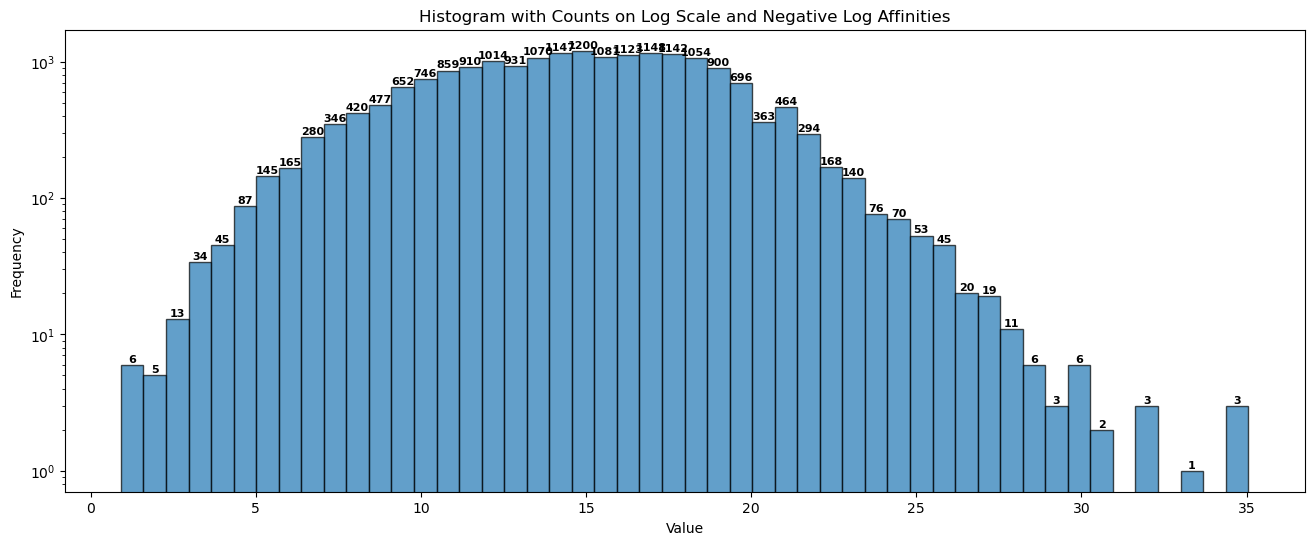

In [11]:
# Set figure size with double width
plt.figure(figsize=(16, 6))  # default is usually (6, 4)

# Create the histogram with log scale for y-axis
n, bins, patches = plt.hist(neglog_affinities, bins=50, edgecolor='black', alpha=0.7, log=True)

# Annotate bars with their counts
for i in range(50):
    if n[i] > 0:  # To avoid placing text for bins with no counts on a log scale
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i]*1.1, str(int(n[i])),
                 ha='center', va='center', fontweight='bold', fontsize=8)

# Setting the y-axis to logarithmic
plt.yscale('log')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Counts on Log Scale and Negative Log Affinities')
plt.show()

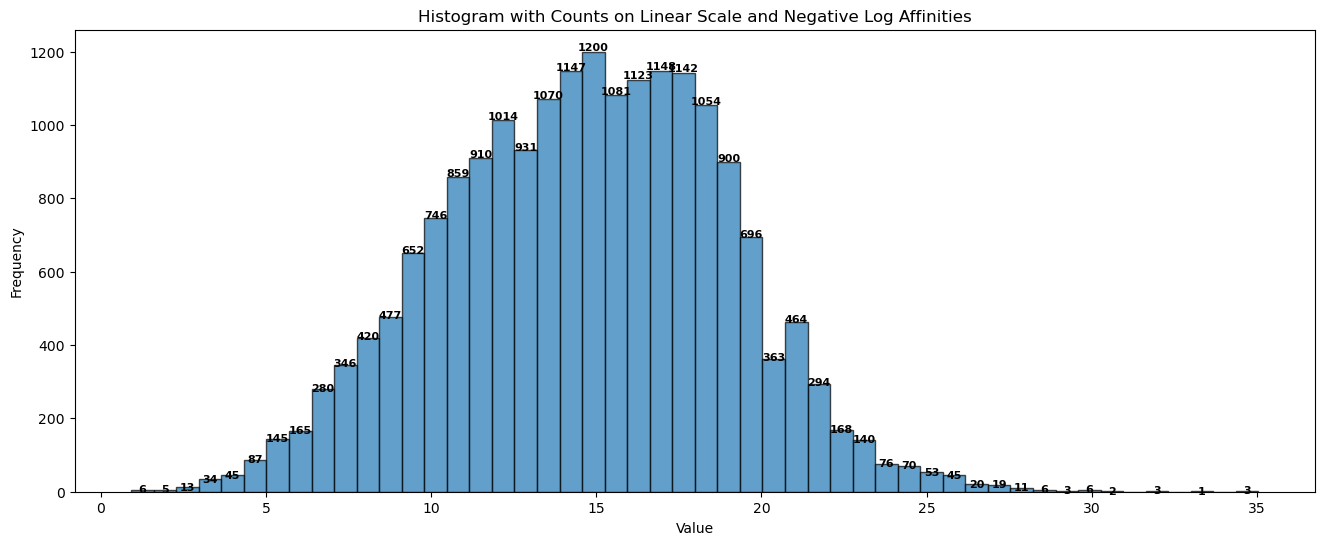

In [13]:
# Set figure size with double width
plt.figure(figsize=(16, 6))  # default is usually (6, 4)

# Create the histogram with log scale for y-axis
n, bins, patches = plt.hist(neglog_affinities, bins=50, edgecolor='black', alpha=0.7, log=True)

# Annotate bars with their counts
for i in range(50):
    if n[i] > 0:  # To avoid placing text for bins with no counts on a log scale
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i]*1.01, str(int(n[i])),
                 ha='center', va='center', fontweight='bold', fontsize=8)

# Setting the y-axis to logarithmic
plt.yscale('linear')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Counts on Linear Scale and Negative Log Affinities')
plt.show()

In [14]:
# Remove tails with extreme values: 

# min in neglog could be 2 -- Extremely low binding (10 datapoints would be clipped)
# max in neglog could be 30 -- Extremely strong affinity (9 datapoints would be clipped)

In [15]:
neglog_affinities_clip = np.clip(neglog_affinities, 2, 30)

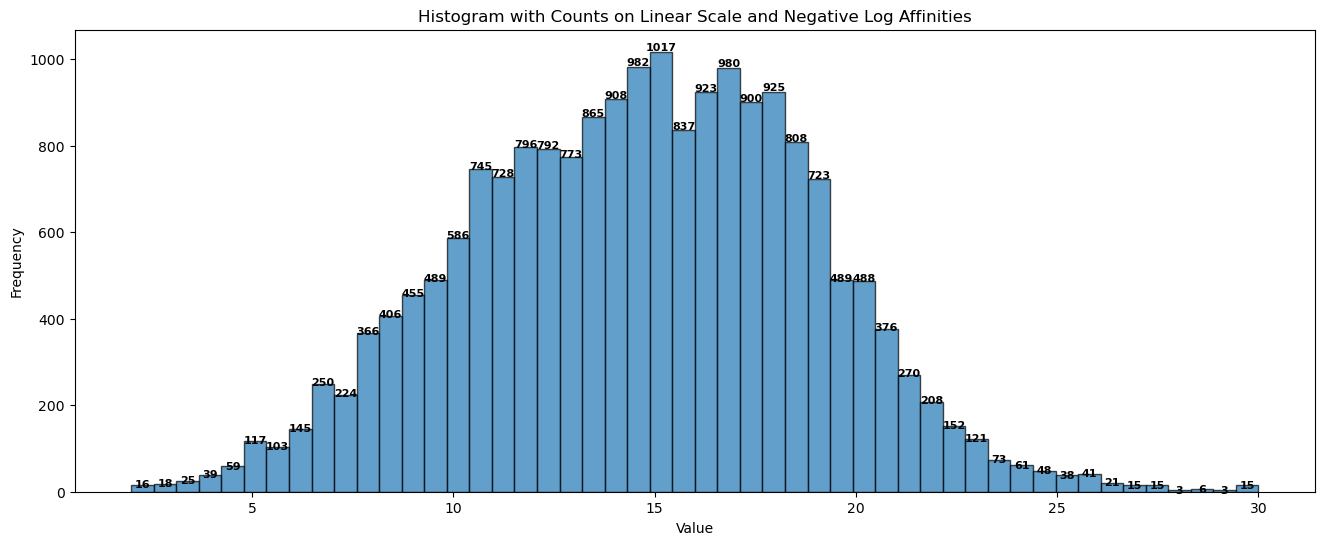

In [16]:
# Set figure size with double width
plt.figure(figsize=(16, 6))  # default is usually (6, 4)

# Create the histogram with log scale for y-axis
n, bins, patches = plt.hist(neglog_affinities_clip, bins=50, edgecolor='black', alpha=0.7, log=True)

# Annotate bars with their counts
for i in range(50):
    if n[i] > 0:  # To avoid placing text for bins with no counts on a log scale
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i]*1.01, str(int(n[i])),
                 ha='center', va='center', fontweight='bold', fontsize=8)

# Setting the y-axis to logarithmic
plt.yscale('linear')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Counts on Linear Scale and Negative Log Affinities')
plt.show()

In [17]:
# Min-Max Scale

neglog_affinities_clip_scaled = (neglog_affinities_clip - np.min(neglog_affinities_clip)) / (np.max(neglog_affinities_clip) - np.min(neglog_affinities_clip))

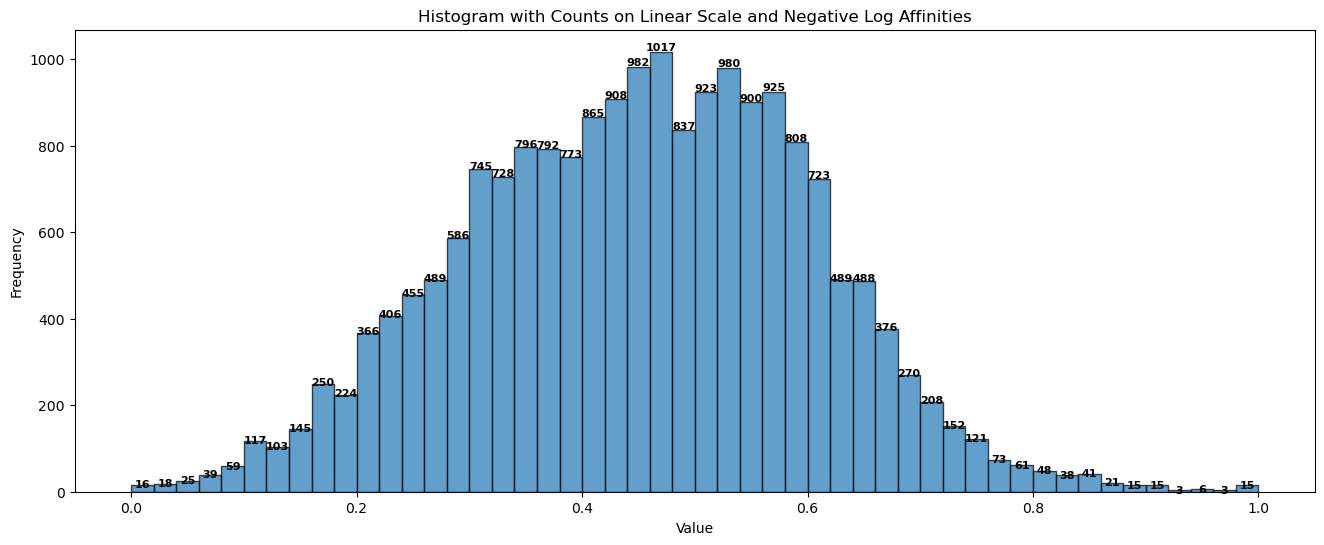

In [18]:
# Set figure size with double width
plt.figure(figsize=(16, 6))  # default is usually (6, 4)

# Create the histogram with log scale for y-axis
n, bins, patches = plt.hist(neglog_affinities_clip_scaled, bins=50, edgecolor='black', alpha=0.7, log=True)

# Annotate bars with their counts
for i in range(50):
    if n[i] > 0:  # To avoid placing text for bins with no counts on a log scale
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i]*1.01, str(int(n[i])),
                 ha='center', va='center', fontweight='bold', fontsize=8)

# Setting the y-axis to logarithmic
plt.yscale('linear')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Counts on Linear Scale and Negative Log Affinities')
plt.show()

### Test how the transformation needs to be done in Dataset.py

In [34]:
collected_transformed = []

import torch

min = 2
max = 30

for aff in affinities:

    aff = torch.tensor(aff)
    log = torch.clamp(-torch.log(aff), min, max)
    scaled = (log - min) / (max - min)

    collected_transformed.append(scaled)


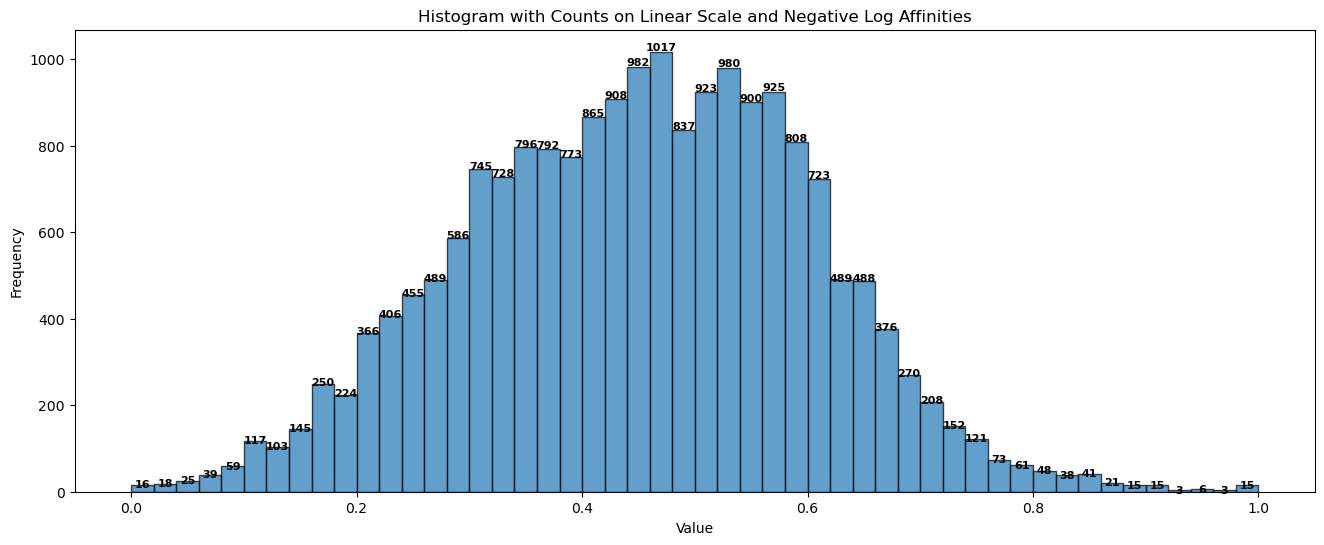

In [35]:
# Set figure size with double width
plt.figure(figsize=(16, 6))  # default is usually (6, 4)

# Create the histogram with log scale for y-axis
n, bins, patches = plt.hist(collected_transformed, bins=50, edgecolor='black', alpha=0.7, log=True)

# Annotate bars with their counts
for i in range(50):
    if n[i] > 0:  # To avoid placing text for bins with no counts on a log scale
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i]*1.01, str(int(n[i])),
                 ha='center', va='center', fontweight='bold', fontsize=8)

# Setting the y-axis to logarithmic
plt.yscale('linear')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Counts on Linear Scale and Negative Log Affinities')
plt.show()